In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("JOB MARKET ANALYSIS - EXPLORATORY DATA ANALYSIS")
print("="*60)

JOB MARKET ANALYSIS - EXPLORATORY DATA ANALYSIS


In [9]:
# Load cleaned data
df = pd.read_csv('cleaned_job_data_driven.csv')
df['published_date'] = pd.to_datetime(df['published_date'])
print(f" Loaded cleaned data: {df.shape[0]} rows, {df.shape[1]} columns")

# Basic Statistics
print("\n" + "="*50)
print("BASIC DATASET STATISTICS")
print("="*50)
print(f" Total Jobs: {len(df):,}")
print(f" Date Range: {df['published_date'].min().date()} to {df['published_date'].max().date()}")
print(f" Countries: {df['country_clean'].nunique()}")
print(f" Job Categories: {df['job_category'].nunique()}")
print(f" Specific Categories: {df['specific_category'].nunique()}")
print(f" Hourly Jobs: {df['is_hourly'].sum():,} ({df['is_hourly'].mean()*100:.1f}%)")
print(f" Fixed Budget Jobs: {(~df['is_hourly']).sum():,} ({(~df['is_hourly']).mean()*100:.1f}%)")


 Loaded cleaned data: 244656 rows, 30 columns

BASIC DATASET STATISTICS
 Total Jobs: 244,656
 Date Range: 2023-11-02 to 2024-03-24
 Countries: 213
 Job Categories: 12
 Specific Categories: 15
 Hourly Jobs: 140,820 (57.6%)
 Fixed Budget Jobs: 103,836 (42.4%)


In [11]:
# 1. JOB CATEGORIES ANALYSIS
print("\n" + "="*50)
print("1. JOB CATEGORIES ANALYSIS")
print("="*50)

# Broad categories
category_counts = df['job_category'].value_counts()
print(" Broad Job Categories Distribution:")
for i, (category, count) in enumerate(category_counts.items()):
    percentage = count / len(df) * 100
    print(f"{i+1:2d}. {category:<25} {count:>6,} jobs ({percentage:>5.1f}%)")


1. JOB CATEGORIES ANALYSIS
 Broad Job Categories Distribution:
 1. Other                     70,026 jobs ( 28.6%)
 2. Software Development      56,842 jobs ( 23.2%)
 3. Design & Creative         31,152 jobs ( 12.7%)
 4. Marketing & Sales         20,286 jobs (  8.3%)
 5. Writing & Content         18,035 jobs (  7.4%)
 6. Customer Support          13,278 jobs (  5.4%)
 7. Business & Management     11,539 jobs (  4.7%)
 8. Data & Analytics          10,117 jobs (  4.1%)
 9. Marketing & Advertising    3,798 jobs (  1.6%)
10. Sales & Business Development  3,452 jobs (  1.4%)
11. E-commerce & Retail        3,377 jobs (  1.4%)
12. Finance & Accounting       2,754 jobs (  1.1%)


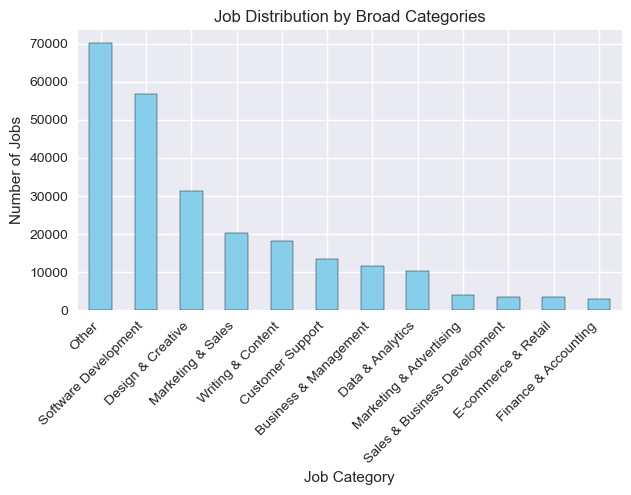

In [13]:
# Create visualization for broad categories
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Job Distribution by Broad Categories')
plt.xlabel('Job Category')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Text(0.5, 1.0, 'Job Categories Distribution (Pie Chart)')

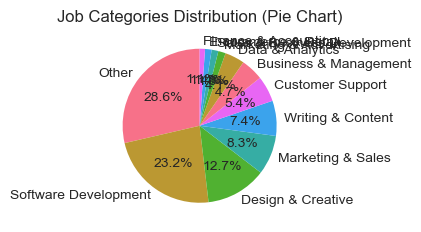

In [15]:
# Pie chart for categories
plt.subplot(2, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Categories Distribution (Pie Chart)')


 Top 10 Specific Categories (Auto-discovered):
 1. Cluster_1_Assist_Need_Data     128,400 jobs ( 52.5%)
 2. Cluster_11_Develop_Stack_Web   14,075 jobs (  5.8%)
 3. Cluster_15_Websit_Develop_Design 12,530 jobs (  5.1%)
 4. Cluster_4_Expert_Googl_Seo     12,279 jobs (  5.0%)
 5. Cluster_8_Design_Web_Product   11,481 jobs (  4.7%)
 6. Cluster_6_Specialist_Market_Seo  8,351 jobs (  3.4%)
 7. Cluster_12_App_Develop_Mobil    7,913 jobs (  3.2%)
 8. Cluster_14_Media_Social_Social_Media  7,370 jobs (  3.0%)
 9. Cluster_3_Manag_Market_Ad       7,347 jobs (  3.0%)
10. Cluster_5_Editor_Video_Editor_Video  7,241 jobs (  3.0%)


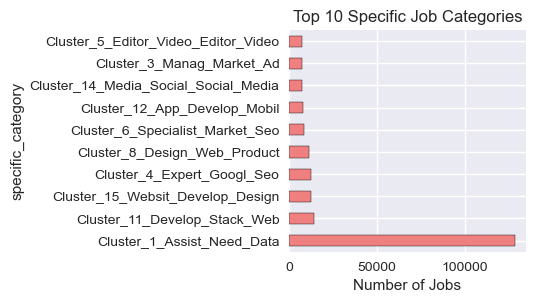

In [19]:
# Specific categories (top 10)
specific_counts = df['specific_category'].value_counts().head(10)
print(f"\n Top 10 Specific Categories (Auto-discovered):")
for i, (category, count) in enumerate(specific_counts.items()):
    percentage = count / len(df) * 100
    print(f"{i+1:2d}. {category:<30} {count:>6,} jobs ({percentage:>5.1f}%)")

plt.subplot(2, 2, 3)
specific_counts.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Top 10 Specific Job Categories')
plt.xlabel('Number of Jobs')
plt.tight_layout()

plt.savefig('job_categories_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# 2. GEOGRAPHIC DISTRIBUTION
print("\n" + "="*50)
print("2. GEOGRAPHIC DISTRIBUTION")
print("="*50)

country_counts = df['country_clean'].value_counts()
print(" Jobs by Country:")
for i, (country, count) in enumerate(country_counts.items()):
    percentage = count / len(df) * 100
    print(f"{i+1:2d}. {country:<15} {count:>6,} jobs ({percentage:>5.1f}%)")




2. GEOGRAPHIC DISTRIBUTION
 Jobs by Country:
 1. USA             99,797 jobs ( 40.8%)
 2. UK              19,129 jobs (  7.8%)
 3. India           15,825 jobs (  6.5%)
 4. Australia       12,617 jobs (  5.2%)
 5. Canada          11,655 jobs (  4.8%)
 6. Pakistan         5,289 jobs (  2.2%)
 7. Unknown          5,076 jobs (  2.1%)
 8. Germany          4,838 jobs (  2.0%)
 9. Netherlands      4,435 jobs (  1.8%)
10. UAE              4,038 jobs (  1.7%)
11. France           3,161 jobs (  1.3%)
12. Spain            2,516 jobs (  1.0%)
13. Singapore        2,500 jobs (  1.0%)
14. Philippines      2,423 jobs (  1.0%)
15. China            2,156 jobs (  0.9%)
16. Israel           2,079 jobs (  0.8%)
17. Ukraine          2,040 jobs (  0.8%)
18. Italy            1,790 jobs (  0.7%)
19. Bangladesh       1,763 jobs (  0.7%)
20. Switzerland      1,756 jobs (  0.7%)
21. Saudi Arabia     1,706 jobs (  0.7%)
22. Hong Kong        1,356 jobs (  0.6%)
23. Poland           1,307 jobs (  0.5%)
24. Sweden 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'UK'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'UAE')])

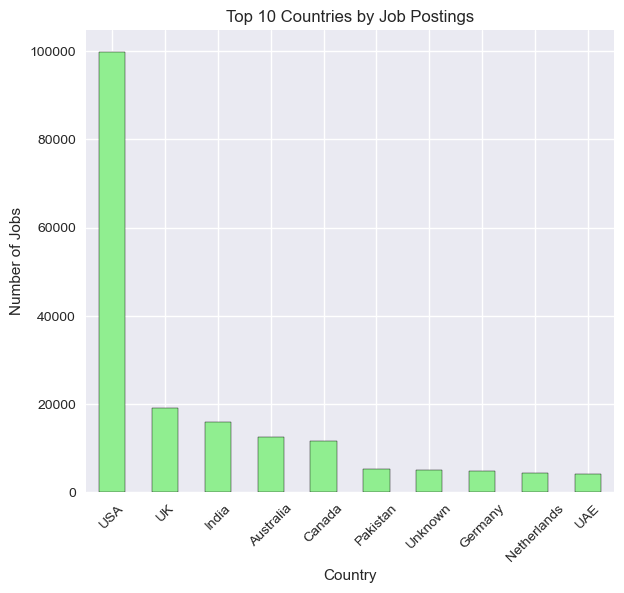

In [25]:
# Geographic visualization
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Countries by Job Postings')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)

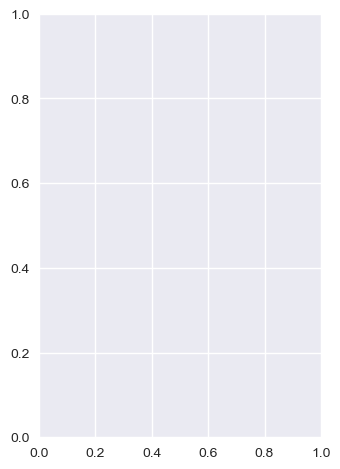

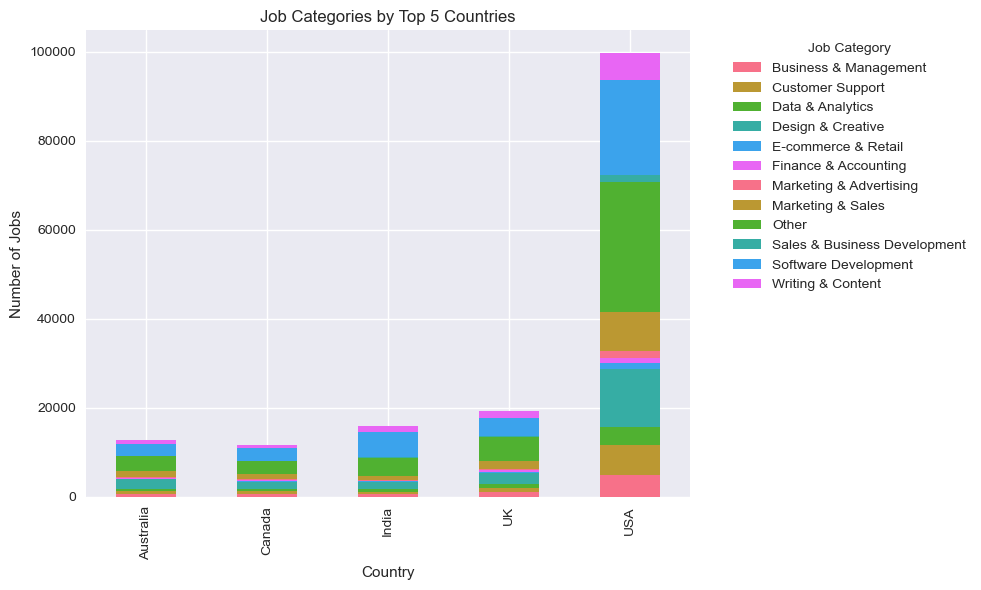

In [27]:
# Jobs by category and country (top countries only)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(5).index
country_category = df[df['country_clean'].isin(top_countries)].groupby(['country_clean', 'job_category']).size().unstack(fill_value=0)
country_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Job Categories by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# 3. SALARY AND BUDGET ANALYSIS
print("\n" + "="*50)
print("3. SALARY AND BUDGET ANALYSIS")
print("="*50)

# Hourly rates analysis
hourly_jobs = df[df['is_hourly'] == True].copy()
hourly_jobs = hourly_jobs[hourly_jobs['avg_hourly_rate'].notna()]

if len(hourly_jobs) > 0:
    print(" Hourly Rates Statistics:")
    print(f"  Average hourly rate: ${hourly_jobs['avg_hourly_rate'].mean():.2f}")
    print(f"  Median hourly rate: ${hourly_jobs['avg_hourly_rate'].median():.2f}")
    print(f"  Min hourly rate: ${hourly_jobs['avg_hourly_rate'].min():.2f}")
    print(f"  Max hourly rate: ${hourly_jobs['avg_hourly_rate'].max():.2f}")
    print(f"  Standard deviation: ${hourly_jobs['avg_hourly_rate'].std():.2f}")

# Budget analysis
budget_jobs = df[df['is_hourly'] == False].copy()
budget_jobs = budget_jobs[budget_jobs['budget'].notna()]

if len(budget_jobs) > 0:
    print(f"\n Project Budget Statistics:")
    print(f"  Average budget: ${budget_jobs['budget'].mean():.2f}")
    print(f"  Median budget: ${budget_jobs['budget'].median():.2f}")
    print(f"  Min budget: ${budget_jobs['budget'].min():.2f}")
    print(f"  Max budget: ${budget_jobs['budget'].max():.2f}")
    print(f"  Standard deviation: ${budget_jobs['budget'].std():.2f}")




3. SALARY AND BUDGET ANALYSIS
 Hourly Rates Statistics:
  Average hourly rate: $20.15
  Median hourly rate: $15.00
  Min hourly rate: $0.00
  Max hourly rate: $200.00
  Standard deviation: $23.15

 Project Budget Statistics:
  Average budget: $508.90
  Median budget: $100.00
  Min budget: $5.00
  Max budget: $50000.00
  Standard deviation: $2154.35


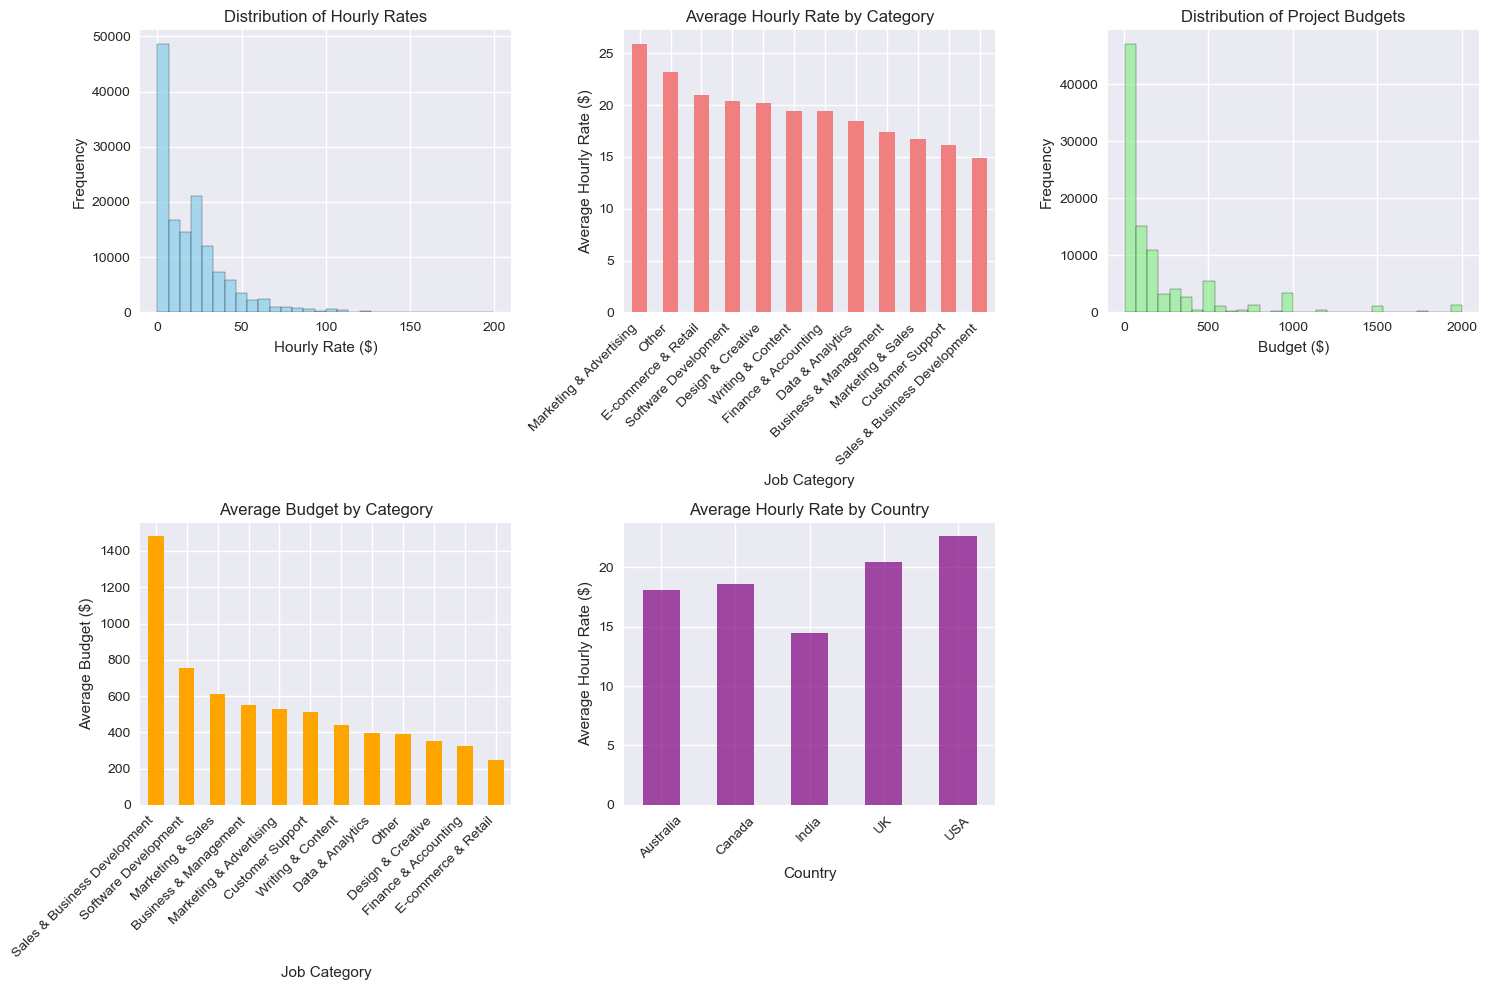

In [35]:
# Salary visualization
plt.figure(figsize=(15, 10))

if len(hourly_jobs) > 0:
    plt.subplot(2, 3, 1)
    plt.hist(hourly_jobs['avg_hourly_rate'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Hourly Rates')
    plt.xlabel('Hourly Rate ($)')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, 2)
    hourly_by_category = hourly_jobs.groupby('job_category')['avg_hourly_rate'].mean().sort_values(ascending=False)
    hourly_by_category.plot(kind='bar', color='lightcoral')
    plt.title('Average Hourly Rate by Category')
    plt.xlabel('Job Category')
    plt.ylabel('Average Hourly Rate ($)')
    plt.xticks(rotation=45, ha='right')

if len(budget_jobs) > 0:
    plt.subplot(2, 3, 3)
    # Remove extreme outliers for better visualization
    budget_clean = budget_jobs[budget_jobs['budget'] <= budget_jobs['budget'].quantile(0.95)]
    plt.hist(budget_clean['budget'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Project Budgets')
    plt.xlabel('Budget ($)')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, 4)
    budget_by_category = budget_jobs.groupby('job_category')['budget'].mean().sort_values(ascending=False)
    budget_by_category.plot(kind='bar', color='orange')
    plt.title('Average Budget by Category')
    plt.xlabel('Job Category')
    plt.ylabel('Average Budget ($)')
    plt.xticks(rotation=45, ha='right')

# Country-wise salary comparison
if len(hourly_jobs) > 0:
    plt.subplot(2, 3, 5)
    top_countries_hourly = hourly_jobs['country_clean'].value_counts().head(5).index
    country_rates = hourly_jobs[hourly_jobs['country_clean'].isin(top_countries_hourly)].groupby('country_clean')['avg_hourly_rate'].mean()
    country_rates.plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Average Hourly Rate by Country')
    plt.xlabel('Country')
    plt.ylabel('Average Hourly Rate ($)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('salary_budget_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [37]:
# 4. TEMPORAL ANALYSIS
print("\n" + "="*50)
print("4. TEMPORAL ANALYSIS")
print("="*50)

# Jobs over time
daily_jobs = df.groupby(df['published_date'].dt.date).size()
weekly_jobs = df.groupby(df['published_date'].dt.to_period('W')).size()
monthly_jobs = df.groupby(df['published_date'].dt.to_period('M')).size()

print(f" Posting Patterns:")
print(f"  Total days covered: {len(daily_jobs)}")
print(f"  Average jobs per day: {daily_jobs.mean():.1f}")
print(f"  Busiest day: {daily_jobs.idxmax()} ({daily_jobs.max()} jobs)")
print(f"  Slowest day: {daily_jobs.idxmin()} ({daily_jobs.min()} jobs)")

# Day of week analysis
dow_counts = df['day_of_week'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = dow_counts.reindex(weekday_order)

print(f"\n Jobs by Day of Week:")
for day, count in dow_counts.items():
    percentage = count / len(df) * 100
    print(f"  {day:<10} {count:>6,} jobs ({percentage:>5.1f}%)")

# Hour of day analysis
if 'hour' in df.columns:
    hour_counts = df['hour'].value_counts().sort_index()
    print(f"\n Peak Posting Hours:")
    peak_hours = hour_counts.nlargest(5)
    for hour, count in peak_hours.items():
        print(f"  {hour:02d}:00 - {count:>6,} jobs")



4. TEMPORAL ANALYSIS
 Posting Patterns:
  Total days covered: 89
  Average jobs per day: 2748.9
  Busiest day: 2024-02-21 (7524 jobs)
  Slowest day: 2023-11-02 (1 jobs)

 Jobs by Day of Week:
  Monday     34,209 jobs ( 14.0%)
  Tuesday    40,200 jobs ( 16.4%)
  Wednesday  41,335 jobs ( 16.9%)
  Thursday   36,709 jobs ( 15.0%)
  Friday     39,272 jobs ( 16.1%)
  Saturday   28,435 jobs ( 11.6%)
  Sunday     24,496 jobs ( 10.0%)

 Peak Posting Hours:
  19:00 - 12,183 jobs
  18:00 - 12,059 jobs
  17:00 - 11,934 jobs
  15:00 - 11,895 jobs
  20:00 - 11,852 jobs


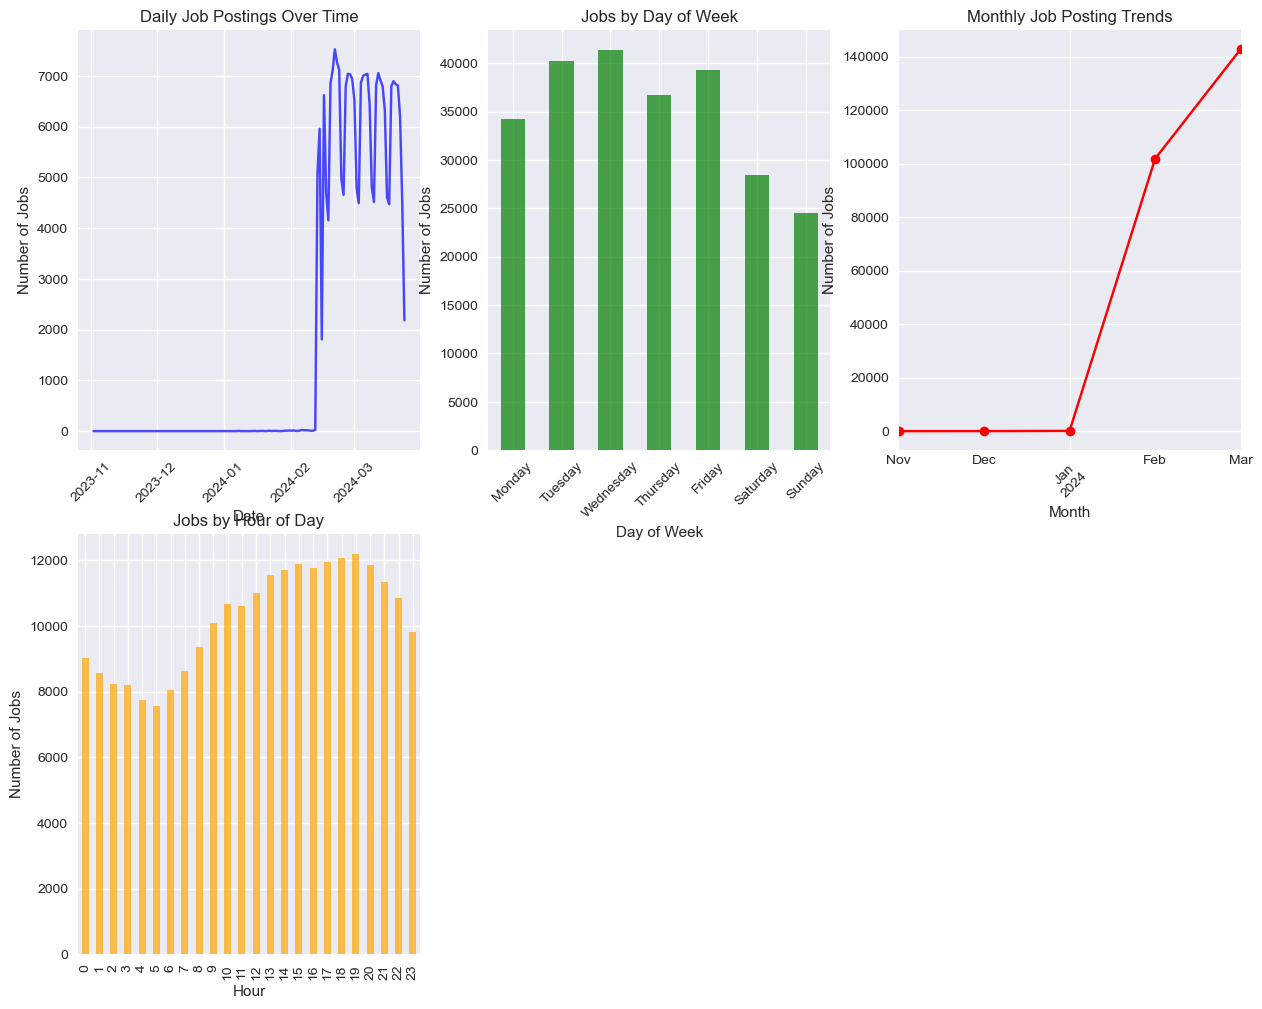

In [39]:
# Temporal visualization
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
daily_jobs.plot(color='blue', alpha=0.7)
plt.title('Daily Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
dow_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Jobs by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)

if len(monthly_jobs) > 1:
    plt.subplot(2, 3, 3)
    monthly_jobs.plot(kind='line', marker='o', color='red')
    plt.title('Monthly Job Posting Trends')
    plt.xlabel('Month')
    plt.ylabel('Number of Jobs')
    plt.xticks(rotation=45)

if 'hour' in df.columns:
    plt.subplot(2, 3, 4)
    hour_counts.plot(kind='bar', color='orange', alpha=0.7)
    plt.title('Jobs by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Jobs')

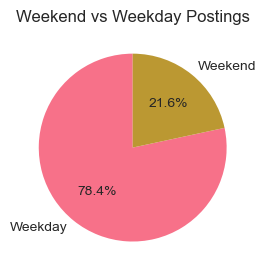

In [41]:
# Weekend vs weekday analysis
plt.subplot(2, 3, 5)
weekend_counts = df['is_weekend'].value_counts()
weekend_labels = ['Weekday', 'Weekend']
plt.pie(weekend_counts.values, labels=weekend_labels, autopct='%1.1f%%', startangle=90)
plt.title('Weekend vs Weekday Postings')

plt.tight_layout()
plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


5. JOB TITLE TEXT ANALYSIS
 Most Common Words in Job Titles:
 1. design          27,455 times (  2.5%)
 2. develop         23,490 times (  2.1%)
 3. websit          17,725 times (  1.6%)
 4. video           16,499 times (  1.5%)
 5. expert          15,388 times (  1.4%)
 6. need            10,681 times (  1.0%)
 7. manag           10,586 times (  0.9%)
 8. market          10,562 times (  0.9%)
 9. amp              9,690 times (  0.9%)
10. specialist       9,148 times (  0.8%)
11. app              8,843 times (  0.8%)
12. editor           8,314 times (  0.7%)
13. assist           8,312 times (  0.7%)
14. media            8,268 times (  0.7%)
15. creat            7,890 times (  0.7%)
16. social           7,718 times (  0.7%)
17. youtub           7,697 times (  0.7%)
18. data             7,163 times (  0.6%)
19. content          6,889 times (  0.6%)
20. wordpress        6,787 times (  0.6%)


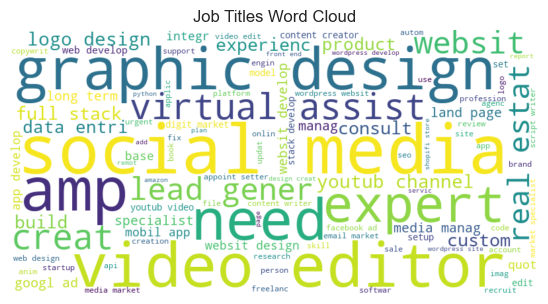

In [43]:
# 5. TEXT ANALYSIS
print("\n" + "="*50)
print("5. JOB TITLE TEXT ANALYSIS")
print("="*50)

# Word frequency analysis
all_processed_text = ' '.join(df['title_processed'].fillna(''))
word_freq = Counter(all_processed_text.split())

print(" Most Common Words in Job Titles:")
for i, (word, freq) in enumerate(word_freq.most_common(20)):
    percentage = freq / len(all_processed_text.split()) * 100
    print(f"{i+1:2d}. {word:<15} {freq:>6,} times ({percentage:>5.1f}%)")

# Create word cloud
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
if all_processed_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=100, colormap='viridis').generate(all_processed_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Job Titles Word Cloud')

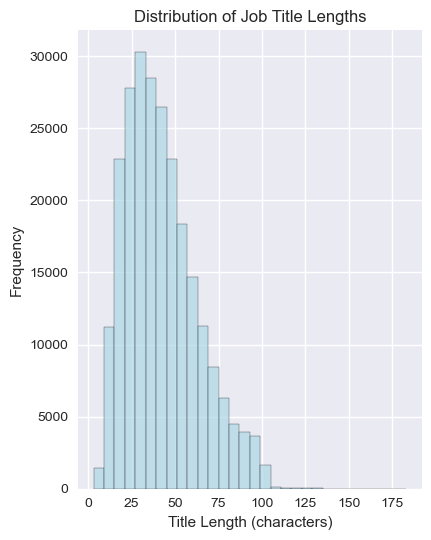

In [45]:
# Title length analysis
plt.subplot(1, 2, 2)
df['title_length'].hist(bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Job Title Lengths')
plt.xlabel('Title Length (characters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('text_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [49]:
# 6. SUMMARY STATISTICS
print("\n" + "="*50)
print("6. EDA SUMMARY")
print("="*50)
print(f" Dataset contains {len(df):,} job postings")
print(f" Spanning {len(daily_jobs)} days from {df['published_date'].min().date()} to {df['published_date'].max().date()}")
print(f" Covers {df['country_clean'].nunique()} countries with {category_counts.iloc[0]} jobs in top category ({category_counts.index[0]})")
print(f" {df['is_hourly'].sum()} hourly jobs with avg rate ${hourly_jobs['avg_hourly_rate'].mean():.2f}/hr" if len(hourly_jobs) > 0 else "✅ No valid hourly rate data")
print(f" {(~df['is_hourly']).sum()} fixed budget jobs with avg budget ${budget_jobs['budget'].mean():.0f}" if len(budget_jobs) > 0 else "✅ No valid budget data")
print(f" Most jobs posted on {dow_counts.idxmax()} ({dow_counts.max():,} jobs)")
print(f" Most common words: {', '.join([word for word, _ in word_freq.most_common(5)])}")

print(f"\n Key Insights:")
print(f"• {category_counts.index[0]} is the dominant job category ({category_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"• {country_counts.index[0]} has the most job postings ({country_counts.iloc[0]/len(df)*100:.1f}%)")
if len(hourly_jobs) > 0 and len(budget_jobs) > 0:
    print(f"• Hourly jobs: {len(hourly_jobs)}, Fixed budget jobs: {len(budget_jobs)}")
print(f"• Peak posting time: {hour_counts.idxmax()}:00" if 'hour' in df.columns and len(hour_counts) > 0 else "")
print(f"• Weekend postings: {df['is_weekend'].sum():,} ({df['is_weekend'].mean()*100:.1f}%)")

print(f"\n EDA completed successfully!")



6. EDA SUMMARY
 Dataset contains 244,656 job postings
 Spanning 89 days from 2023-11-02 to 2024-03-24
 Covers 213 countries with 70026 jobs in top category (Other)
 140820 hourly jobs with avg rate $20.15/hr
 103836 fixed budget jobs with avg budget $509
 Most jobs posted on Wednesday (41,335 jobs)
 Most common words: design, develop, websit, video, expert

 Key Insights:
• Other is the dominant job category (28.6%)
• USA has the most job postings (40.8%)
• Hourly jobs: 140436, Fixed budget jobs: 103660
• Peak posting time: 19:00
• Weekend postings: 52,931 (21.6%)

 EDA completed successfully!


In [51]:
# Save cleaned data
output_file = 'cleaned_job_EDA.csv'
df.to_csv(output_file, index=False)
print(f"\n Cleaned data saved to: {output_file}")



 Cleaned data saved to: cleaned_job_EDA.csv
